# **Experiment Notebook**



## Context


### 0. Import Packages

In [ ]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### 1.   Load Dataset

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')


def combine_csv_files(directory):
    csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]
    combined_df = None
    for i, file in enumerate(csv_files):
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path,sep = '|')
        if i == 0:
            combined_df = df
        else:
            combined_df = pd.concat([combined_df, df], ignore_index=True)
    return combined_df

def main():
    # Directory containing CSV files in Google Drive
    directory = '/content/drive/MyDrive/ML Transaction Files/final'

    # Combining CSV files
    combined_df = combine_csv_files(directory)

    # Export combined dataframe to CSV
    combined_df.to_csv('/content/drive/MyDrive/ML Transaction Files/combined_transactions.csv', index=False)
    print("Combined CSV file saved as 'combined_transactions.csv'")

if __name__ == "__main__":
    main()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Combined CSV file saved as 'combined_transactions.csv'


In [ ]:

data_customer_url = '/content/drive/My Drive/ML Files/customers.csv'
transaction_url = '/content/drive/My Drive/ML Transaction Files/combined_transactions.csv'

customer_data = pd.read_csv(data_customer_url,sep='|')
combined_transaction_data = pd.read_csv(transaction_url,sep = ',')

df_customer = pd.DataFrame(customer_data)
df_transaction = pd.DataFrame(combined_transaction_data)


In [ ]:
df_customer

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
1,715-55-5575,4351161559407816183,Elaine,Fuller,F,310 Kendra Common Apt. 164,Leland,NC,28451,34.2680,-78.0578,27112,Professor Emeritus,1963-06-07,917558277935
2,167-48-5821,4192832764832,Michael,Cameron,M,05641 Robin Port,Cordova,SC,29039,33.4275,-80.8857,4215,International aid/development worker,1973-05-30,718172762479
3,406-83-7518,4238849696532874,Brandon,Williams,M,26916 Carlson Mountain,Birmingham,AL,35242,33.3813,-86.7046,493806,Seismic interpreter,1942-12-26,947268892251
4,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Fargo,GA,31631,30.7166,-82.5801,559,Medical laboratory scientific officer,1939-05-22,888335239225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,392-96-7670,30125158904184,Sarah,Martin,F,1666 Jenna Unions,Denver,CO,80236,39.6535,-105.0376,990452,Colour technologist,1993-08-31,201218361926
996,594-17-7993,180047909863618,Erin,Wells,F,444 Alexis Estate Suite 824,Wasco,CA,93280,35.6480,-119.4487,27152,Software engineer,1982-05-27,921460407733
997,196-93-1156,4371450311809,Michael,James,M,914 Cassandra Gateway Suite 061,Escondido,CA,92026,33.1605,-117.0978,171802,Agricultural consultant,1999-05-14,499348764671
998,895-65-9304,3519925692476886,Michael,Lewis,M,34141 Katelyn Path,Mattapan,MA,2126,42.2739,-71.0939,25562,Civil Service administrator,1994-02-23,617852071065


In [ ]:
df_transaction

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,4218196001337,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522
1,4218196001337,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359
2,4218196001337,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327
3,4218196001337,888022315787,5782693d7c70f062f258cb30bfa8900f,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342
4,4218196001337,888022315787,35fd7db657d7e30dd608c37f7798186e,1549840400,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434
...,...,...,...,...,...,...,...,...,...,...
4260899,675986887866,987989291479,e86b36e3dc4b594d9abedc0066e93f87,1662815833,shopping_net,918.03,1,Simpson-Douglas,37.943482,-88.210426
4260900,675986887866,987989291479,8e2759bc257d45fce0a64d92cfddb33e,1662816108,shopping_pos,1197.08,1,"Smith, White and Goodwin",36.791794,-89.237758
4260901,675986887866,987989291479,4793f473f9de850f16d3f3f62141f124,1662813693,shopping_pos,894.79,1,"Peterson, King and Khan",36.473072,-88.103133
4260902,675986887866,987989291479,f641ddaf172e3a0f643df4a9528b5866,1662813294,shopping_net,1172.11,1,Kennedy-Davis,37.619328,-89.404065


### 2. Explore Dataset

In [ ]:
df_customer.shape

(1000, 15)

In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ssn       1000 non-null   object 
 1   cc_num    1000 non-null   int64  
 2   first     1000 non-null   object 
 3   last      1000 non-null   object 
 4   gender    1000 non-null   object 
 5   street    1000 non-null   object 
 6   city      1000 non-null   object 
 7   state     1000 non-null   object 
 8   zip       1000 non-null   int64  
 9   lat       1000 non-null   float64
 10  long      1000 non-null   float64
 11  city_pop  1000 non-null   int64  
 12  job       1000 non-null   object 
 13  dob       1000 non-null   object 
 14  acct_num  1000 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 117.3+ KB


In [ ]:
df_customer.isnull().sum()

ssn         0
cc_num      0
first       0
last        0
gender      0
street      0
city        0
state       0
zip         0
lat         0
long        0
city_pop    0
job         0
dob         0
acct_num    0
dtype: int64

In [ ]:
duplicate_rows = df_customer[df_customer.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [ssn, cc_num, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, acct_num]
Index: []


In [ ]:
df_transaction.shape

(4260904, 10)

In [ ]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260904 entries, 0 to 4260903
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   acct_num    int64  
 2   trans_num   object 
 3   unix_time   int64  
 4   category    object 
 5   amt         float64
 6   is_fraud    int64  
 7   merchant    object 
 8   merch_lat   float64
 9   merch_long  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 325.1+ MB


In [ ]:
df_transaction.isnull().sum()

cc_num        0
acct_num      0
trans_num     0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
dtype: int64

In [ ]:
duplicate_rows = df_transaction[df_transaction.duplicated]
print(duplicate_rows)

Empty DataFrame
Columns: [cc_num, acct_num, trans_num, unix_time, category, amt, is_fraud, merchant, merch_lat, merch_long]
Index: []


In [ ]:
#merging the transaction and customer dataset
merged_df = pd.merge(df_customer, df_transaction, on=['acct_num', 'cc_num'], how='inner')
merged_df

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,dob,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522
1,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359
2,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327
3,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,5782693d7c70f062f258cb30bfa8900f,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342
4,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,35fd7db657d7e30dd608c37f7798186e,1549840400,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,1942-07-21,298026601683,4eafc5b16da625c3436f2484d8dcabcb,1627636943,health_fitness,7.47,0,"Horton, Ware and Reynolds",27.707908,-82.320308
4260900,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,1942-07-21,298026601683,041b18f68b893b68e7aa29c16a08a08d,1624880326,food_dining,2.30,0,Hanson and Sons,27.896372,-83.387356
4260901,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,1942-07-21,298026601683,a26df5348dfee4839f0fa00155e2ed1c,1629797869,health_fitness,5.82,0,White LLC,27.110602,-82.426821
4260902,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,1942-07-21,298026601683,e388fc8055b1426c62640baaae10108f,1629976595,health_fitness,9.16,0,Snyder-Johnson,28.110510,-81.891797


In [ ]:
merged_df.shape

(4260904, 23)

In [ ]:
merged_df.isnull().sum()

ssn           0
cc_num        0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
acct_num      0
trans_num     0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
dtype: int64

### 3. Explore Target variable

In [ ]:
#our goal is to predict the total spending amount for next month, therefore month column is extracted from datetime
#similarly, total spend per month is calculated by grouping acct_num and cc_num in order to help customer, bank and financial institutions to budget their finances.


merged_df['datetime'] = pd.to_datetime(merged_df['unix_time'],unit='s')
merged_df['month'] = merged_df['datetime'].dt.month


# Grouping by acc_number and cc_number and calculating total spend money in a month
total_spend_per_month = merged_df.groupby(['acct_num', 'cc_num', 'month'])['amt'].sum().reset_index()

# Merging the new column with the original DataFrame
merged_df = merged_df.merge(total_spend_per_month, on=['acct_num', 'cc_num', 'month'], suffixes=('', '_spend_per_mnth'))

# Print the updated DataFrame
merged_df[['month','amt_spend_per_mnth']]

,month,amt_spend_per_mnth
0,5,21188.95
1,5,21188.95
2,5,21188.95
3,5,21188.95
4,5,21188.95
...,...,...
4260899,11,23394.08
4260900,11,23394.08
4260901,11,23394.08
4260902,11,23394.08


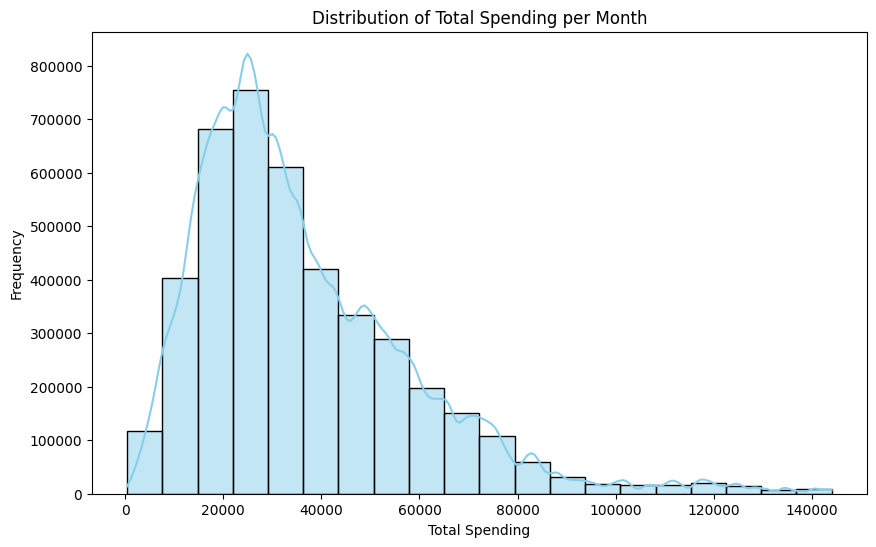

In [ ]:
# Plotting the distribution of total spending per month
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['amt_spend_per_mnth'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Spending per Month')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.show()

In [ ]:

print("Statistical Summary of Total Spending per Month:")
print(merged_df['amt_spend_per_mnth'].describe())


Statistical Summary of Total Spending per Month:
count    4.260904e+06
mean     3.639086e+04
std      2.238680e+04
min      3.964600e+02
25%      2.053873e+04
50%      3.090353e+04
75%      4.798892e+04
max      1.440309e+05
Name: amt_spend_per_mnth, dtype: float64


### 4. Explore Variables of Interest

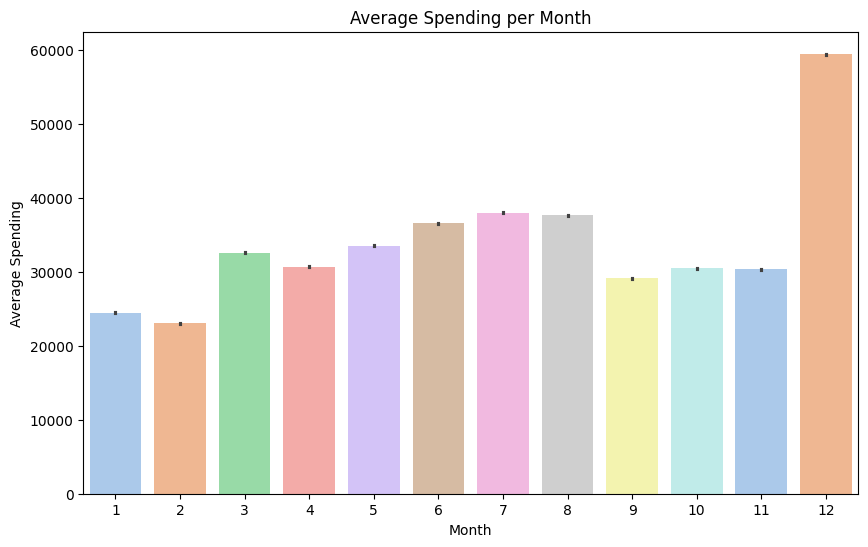

In [ ]:
# Visualizing the relationship between total spending spending per month and month by a bar chart
#According to this bar chart, total spending is highest in December.
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='amt_spend_per_mnth', data=merged_df, palette='pastel')
plt.title('Average Spending per Month')
plt.xlabel('Month')
plt.ylabel('Average Spending')
plt.show()

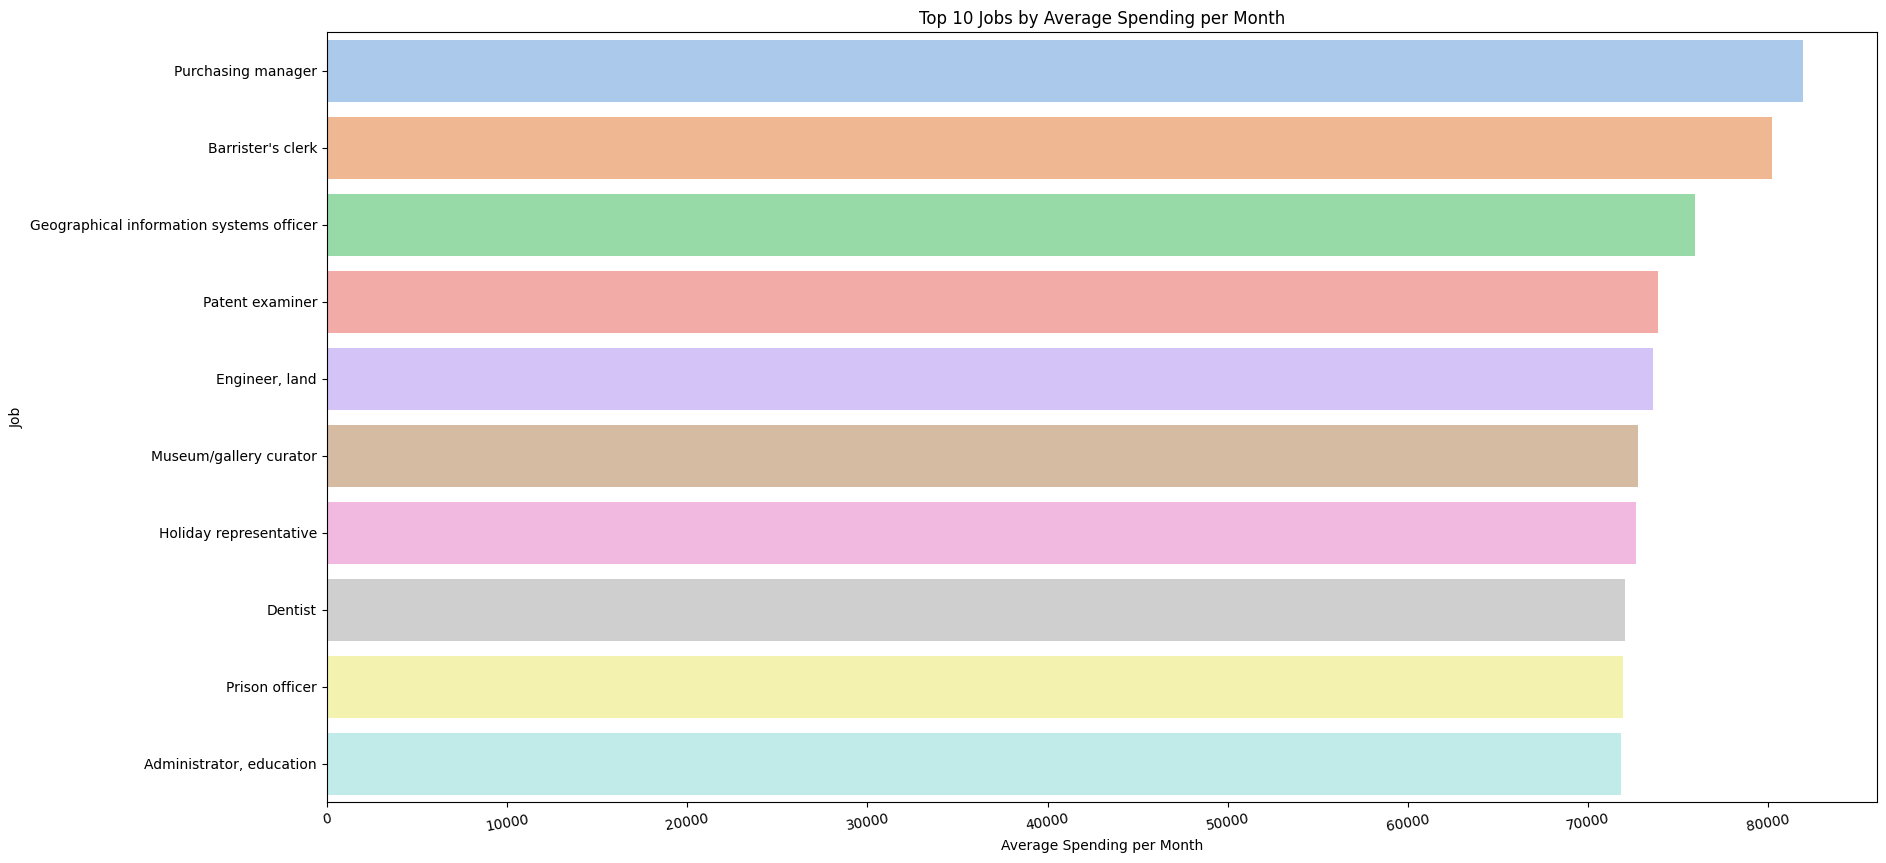

In [ ]:

#According to this bar chart given below, total spending is highest who is a purchasing manager

# Calculating average spending per month for each job
avg_spend_per_job = merged_df.groupby('job')['amt_spend_per_mnth'].mean().reset_index()

# Selecting top 10 jobs by average spending per month
top_10_jobs = avg_spend_per_job.nlargest(10, 'amt_spend_per_mnth')

# Creating a bar plot for the top 10 jobs(Focusing on Top 10 Job since there are large number of unique job types)
plt.figure(figsize=(20, 10))
sns.barplot(x='amt_spend_per_mnth', y='job', data=top_10_jobs,hue='job', palette='pastel')
plt.title('Top 10 Jobs by Average Spending per Month')
plt.xlabel('Average Spending per Month')
plt.ylabel('Job')
plt.xticks(rotation=10)
plt.show()

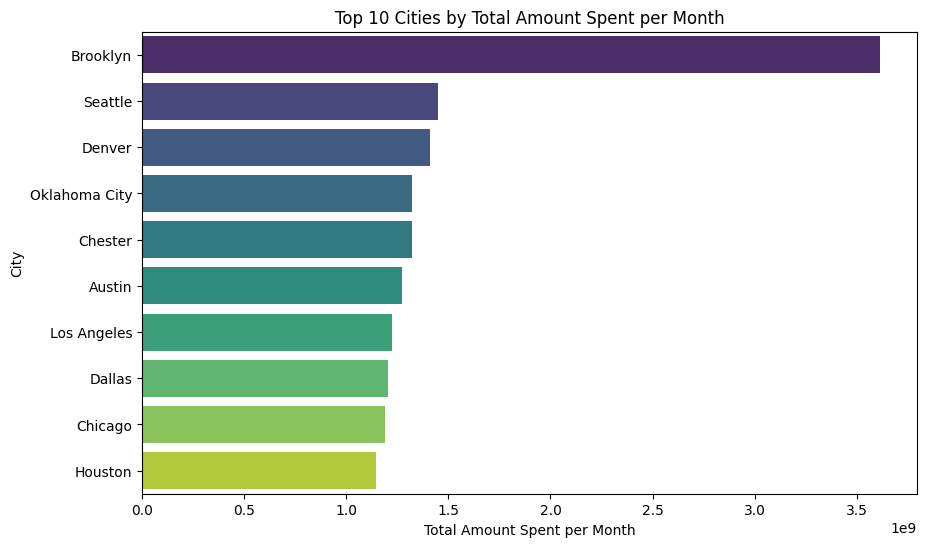

In [ ]:

#According to this bar chart, total spending is highest in the Brooklyn city

# Grouping by city and calculate total amount spent per month
city_total_spending = merged_df.groupby('city')['amt_spend_per_mnth'].sum().reset_index()

# Sorting the cities based on total amount spent per month
city_total_spending_sorted = city_total_spending.sort_values(by='amt_spend_per_mnth', ascending=False)

# Selecting the top 10 cities
top_10_cities = city_total_spending_sorted.head(10)


# Creating a bar plot for the top 10 cities
plt.figure(figsize=(10, 6))
sns.barplot(x='amt_spend_per_mnth', y='city', data=top_10_cities,hue = 'city' ,palette='viridis')
plt.title('Top 10 Cities by Total Amount Spent per Month')
plt.xlabel('Total Amount Spent per Month')
plt.ylabel('City')
plt.show()




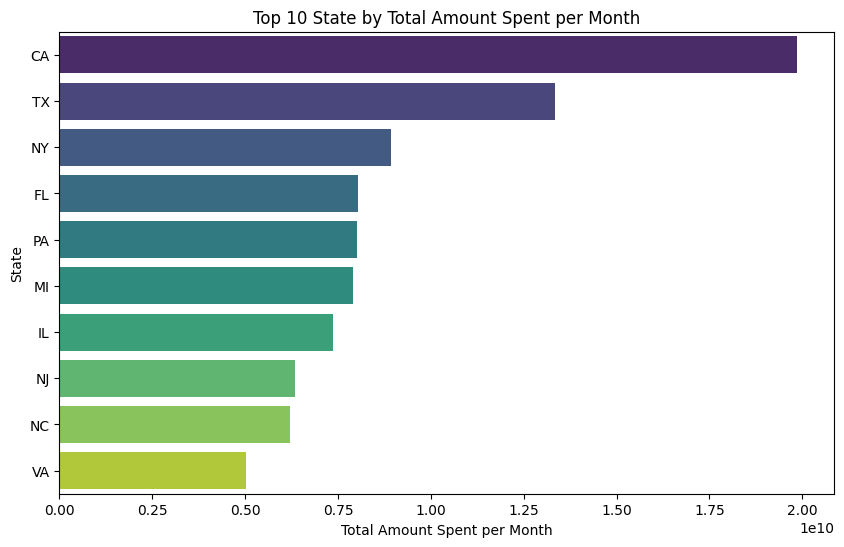

In [ ]:

#According to this bar chart, total spending is highest in the 'CA' state

# Grouping by state and calculate total amount spent per month
state_total_spending = merged_df.groupby('state')['amt_spend_per_mnth'].sum().reset_index()

# Sorting the states based on total amount spent per month
state_total_spending_sorted = state_total_spending.sort_values(by='amt_spend_per_mnth', ascending=False)

# Selecting the top 10 state
top_10_state = state_total_spending_sorted.head(10)


# Creating a bar plot for the top 10 state
plt.figure(figsize=(10, 6))
sns.barplot(x='amt_spend_per_mnth', y='state', data=top_10_state,hue = 'state' ,palette='viridis')
plt.title('Top 10 State by Total Amount Spent per Month')
plt.xlabel('Total Amount Spent per Month')
plt.ylabel('State')
plt.show()




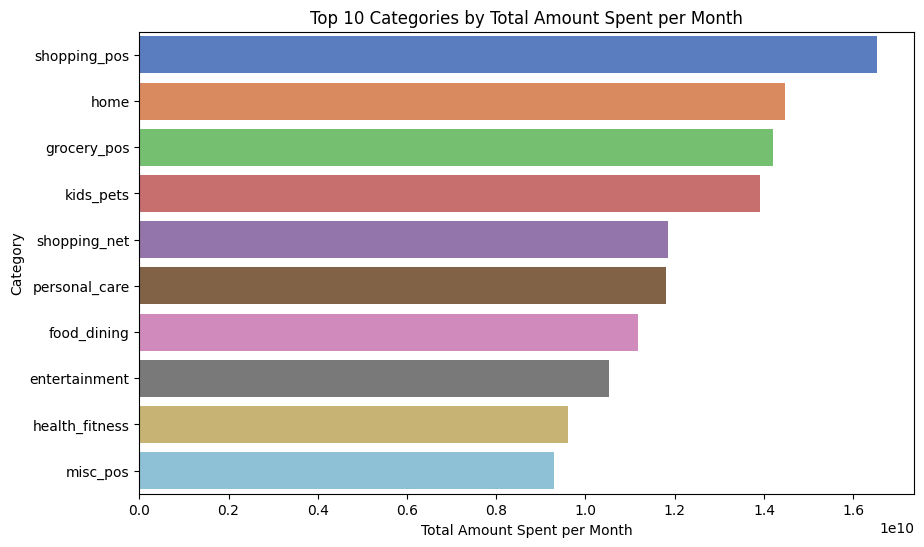

In [ ]:
#According to this bar chart total spending is highest by shopping pos.

# Getting the top 10 categories
top_10_categories = merged_df.groupby('category')['amt_spend_per_mnth'].sum().nlargest(10).reset_index()

# Creating a bar plot for the top 10 categories
plt.figure(figsize=(10, 6))
sns.barplot(x='amt_spend_per_mnth', y='category', data=top_10_categories, hue = 'category' ,palette='muted')
plt.title('Top 10 Categories by Total Amount Spent per Month')
plt.xlabel('Total Amount Spent per Month')
plt.ylabel('Category')
plt.show()

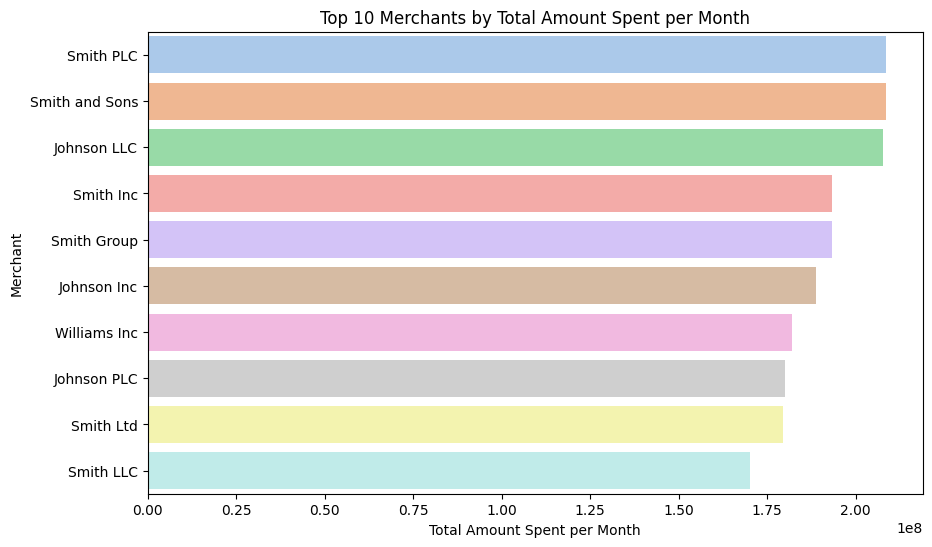

In [ ]:
#According to this bar chart, total spending is highest of ' Smith PLC' merchant.

# Getting the top 10 merchants
top_10_merchants = merged_df.groupby('merchant')['amt_spend_per_mnth'].sum().nlargest(10).reset_index()

# Creating a bar plot for the top 10 merchants
plt.figure(figsize=(10, 6))
sns.barplot(x='amt_spend_per_mnth', y='merchant', data=top_10_merchants,hue ='merchant', palette='pastel')
plt.title('Top 10 Merchants by Total Amount Spent per Month')
plt.xlabel('Total Amount Spent per Month')
plt.ylabel('Merchant')
plt.show()

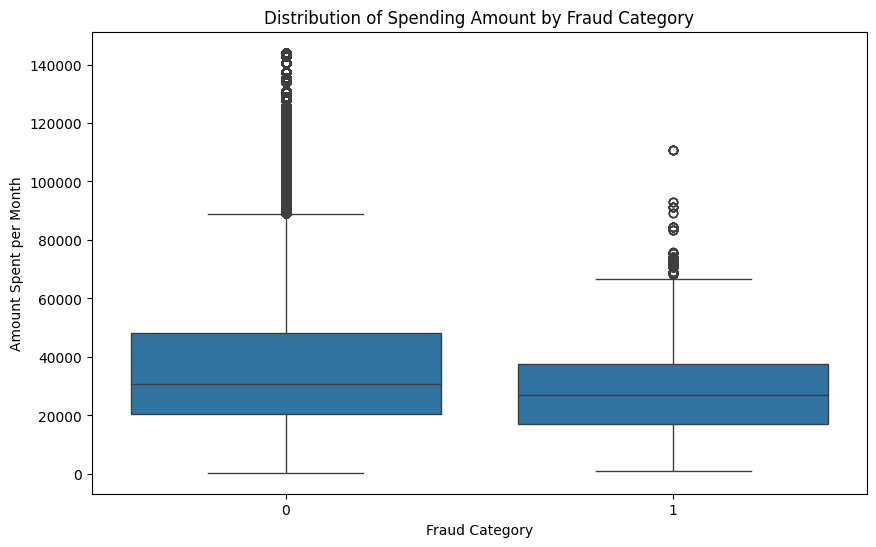

In [ ]:
# Creating a box plot to visualize the distribution of spending amounts for each category of fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt_spend_per_mnth', data=merged_df)
plt.title('Distribution of Spending Amount by Fraud Category')
plt.xlabel('Fraud Category')
plt.ylabel('Amount Spent per Month')
plt.show()

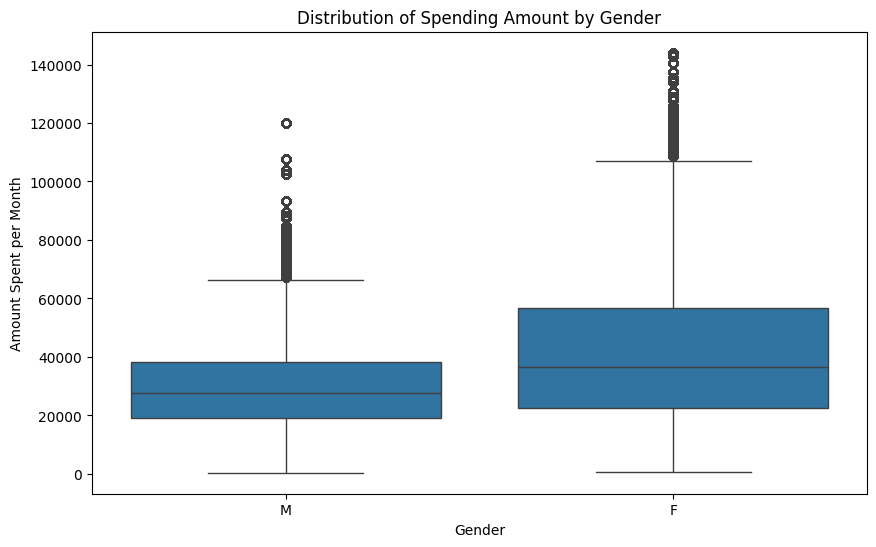

In [ ]:
# Creating a box plot to visualize the distribution of spending amounts by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='amt_spend_per_mnth', data=merged_df)
plt.title('Distribution of Spending Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Amount Spent per Month')
plt.show()

### 5. Prepare Data

In [ ]:
df_cleaned = merged_df.copy()

In [ ]:
# #The columns from df_merged are dropped since these columns has many unique values which might result in sparse data and can negatively impact the model's ability to generalize well on unseen data
# df_cleaned.drop(['first','last'],axis = 1, inplace = True)

In [ ]:
#performing binarization in gender using map function
df_cleaned['gender_encoded'] = df_cleaned['gender'].map({'M':1,'F':0})
df_cleaned[['gender','gender_encoded']]

,gender,gender_encoded
0,M,1
1,M,1
2,M,1
3,M,1
4,M,1
...,...,...
4260899,M,1
4260900,M,1
4260901,M,1
4260902,M,1


In [ ]:
import datetime as dt

#converting dob to age
df_cleaned['dob'] = pd.to_datetime(df_cleaned['dob'])

#calculating age
current_year = pd.Timestamp.now().year
df_cleaned['age'] = current_year - df_cleaned['dob'].dt.year
df_cleaned[['dob','age']]


,dob,age
0,1959-10-03,65
1,1959-10-03,65
2,1959-10-03,65
3,1959-10-03,65
4,1959-10-03,65
...,...,...
4260899,1942-07-21,82
4260900,1942-07-21,82
4260901,1942-07-21,82
4260902,1942-07-21,82


In [ ]:
# Performing frequency encoding
frequency_encoding_job = df_cleaned['job'].value_counts(normalize=True)
df_cleaned['job_frequency_encoded'] = df_cleaned['job'].map(frequency_encoding_job)

frequency_encoding_city = df_cleaned['city'].value_counts(normalize=True)
df_cleaned['city_encoded'] = df_cleaned['city'].map(frequency_encoding_city)

frequency_encoding_street = df_cleaned['street'].value_counts(normalize=True)
df_cleaned['street_encoded'] = df_cleaned['street'].map(frequency_encoding_street)




frequency_encoding_category = df_cleaned['category'].value_counts(normalize = True)
df_cleaned['category_encoded'] = df_cleaned['category'].map(frequency_encoding_category)

frequency_encoding_merchant = df_cleaned['merchant'].value_counts(normalize = True)
df_cleaned['merchant_encoded']=df_cleaned['merchant'].map(frequency_encoding_merchant)

frequency_encoding_first = df_cleaned['first'].value_counts(normalize = True)
df_cleaned['first_encoded'] = df_cleaned['first'].map(frequency_encoding_first)

frequency_encoding_last = df_cleaned['last'].value_counts(normalize = True)
df_cleaned['last_encoded'] = df_cleaned['last'].map(frequency_encoding_last)




df_cleaned[['job','job_frequency_encoded','city','city_encoded','street','street_encoded','category','category_encoded','merchant','merchant_encoded','first','first_encoded','last','last_encoded']]

,job,job_frequency_encoded,city,city_encoded,street,street_encoded,category,category_encoded,merchant,merchant_encoded,first,first_encoded,last,last_encoded
0,Accounting technician,0.00333,Ambler,0.001277,863 Lawrence Valleys,0.000769,gas_transport,0.085717,Phillips Group,0.000306,Jonathan,0.002905,Johnson,0.014160
1,Accounting technician,0.00333,Ambler,0.001277,863 Lawrence Valleys,0.000769,food_dining,0.075334,Rollins-Riley,0.000036,Jonathan,0.002905,Johnson,0.014160
2,Accounting technician,0.00333,Ambler,0.001277,863 Lawrence Valleys,0.000769,gas_transport,0.085717,Jordan PLC,0.000039,Jonathan,0.002905,Johnson,0.014160
3,Accounting technician,0.00333,Ambler,0.001277,863 Lawrence Valleys,0.000769,food_dining,0.075334,Holloway Ltd,0.000033,Jonathan,0.002905,Johnson,0.014160
4,Accounting technician,0.00333,Ambler,0.001277,863 Lawrence Valleys,0.000769,food_dining,0.075334,Rodriguez-Henderson,0.000077,Jonathan,0.002905,Johnson,0.014160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,Manufacturing systems engineer,0.00512,Saint Petersburg,0.001450,67148 Rose Cliff Apt. 314,0.001280,home,0.094636,"Hernandez, Henry and Brennan",0.000043,Isaac,0.001280,Smith,0.019543
4260900,Manufacturing systems engineer,0.00512,Saint Petersburg,0.001450,67148 Rose Cliff Apt. 314,0.001280,home,0.094636,French-Allen,0.000049,Isaac,0.001280,Smith,0.019543
4260901,Manufacturing systems engineer,0.00512,Saint Petersburg,0.001450,67148 Rose Cliff Apt. 314,0.001280,personal_care,0.070579,Garcia and Sons,0.000499,Isaac,0.001280,Smith,0.019543
4260902,Manufacturing systems engineer,0.00512,Saint Petersburg,0.001450,67148 Rose Cliff Apt. 314,0.001280,personal_care,0.070579,"Howard, Fisher and Taylor",0.000033,Isaac,0.001280,Smith,0.019543


In [ ]:

frequency_encoding_state = df_cleaned['state'].value_counts(normalize = True)
df_cleaned['state_encoded'] = df_cleaned['state'].map(frequency_encoding_state)

In [ ]:
#dropping the columns to remove redundancy and unwanted noise
df_cleaned.drop(['job','city','state','street','trans_num','ssn','category','merchant','gender','dob','unix_time','datetime','first','last'],axis = 1, inplace = True)

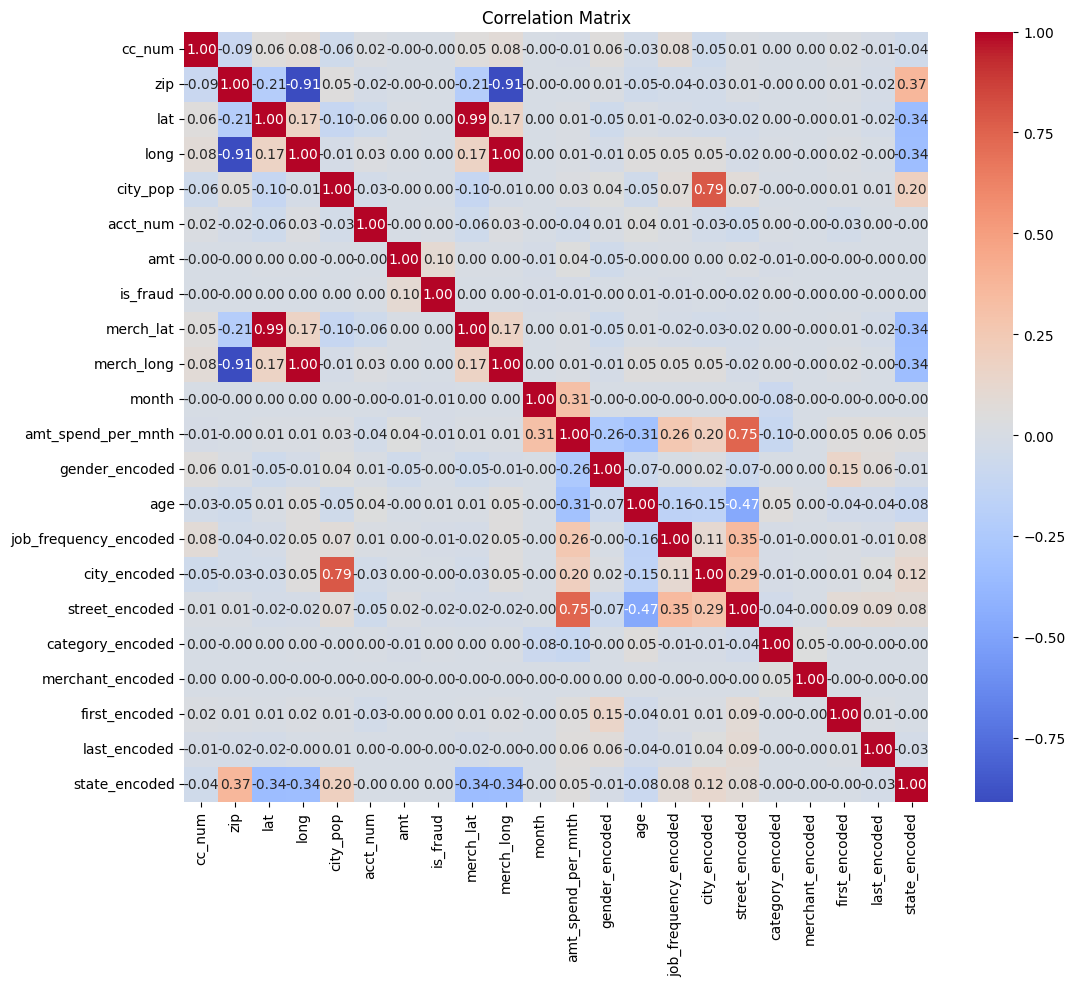

In [ ]:
#correlation analysis is performed for feature selection

import seaborn as sns
# Calculating correlation matrix
corr_matrix = df_cleaned.corr()

# Plotting heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:

selected_columns = ['gender_encoded','age','job_frequency_encoded','city_encoded','street_encoded','category_encoded','month','amt_spend_per_mnth']

In [ ]:
df_cleaned = df_cleaned[selected_columns]
df_cleaned


,gender_encoded,age,job_frequency_encoded,city_encoded,street_encoded,category_encoded,month,amt_spend_per_mnth
0,1,65,0.00333,0.001277,0.000769,0.085717,5,21188.95
1,1,65,0.00333,0.001277,0.000769,0.075334,5,21188.95
2,1,65,0.00333,0.001277,0.000769,0.085717,5,21188.95
3,1,65,0.00333,0.001277,0.000769,0.075334,5,21188.95
4,1,65,0.00333,0.001277,0.000769,0.075334,5,21188.95
...,...,...,...,...,...,...,...,...
4260899,1,82,0.00512,0.001450,0.001280,0.094636,11,23394.08
4260900,1,82,0.00512,0.001450,0.001280,0.094636,11,23394.08
4260901,1,82,0.00512,0.001450,0.001280,0.070579,11,23394.08
4260902,1,82,0.00512,0.001450,0.001280,0.070579,11,23394.08


### 6. Split Dataset

In [ ]:
y= df_cleaned.pop('amt_spend_per_mnth')
X = df_cleaned

In [ ]:
from sklearn.model_selection import train_test_split


# First splitting: 60% training and 40% remaining (which will be split into validation and test)
X_train, X_data, y_train, y_data = train_test_split(X, y, test_size=0.4, random_state=8)



In [ ]:
# Second split: Split the remaining 40% into 50% validation and 50% test (which gives 20% each of the total dataset)
X_val, X_test, y_val, y_test = train_test_split(X_data, y_data, test_size=0.5, random_state=8)


### 7. Baseline Model

In [ ]:
y_train_central =y_train.mean()
y_val_central = y_val.mean()
y_test_central = y_test.mean()

In [ ]:
y_train_base = np.full(y_train.shape, y_train_central)
y_val_base = np.full(y_val.shape,y_val_central)
y_test_base = np.full(y_test.shape,y_test_central)

In [ ]:
from sklearn.metrics import mean_squared_error
train_perf = mean_squared_error(y_train,y_train_base,squared = False)
valid_perf = mean_squared_error(y_val,y_val_base,squared=False)
test_perf  = mean_squared_error(y_test,y_test_base,squared=False)

In [ ]:
print(f'Training Performance {train_perf}')
print(f'Validation Performance {valid_perf}')
print(f'Test Performance {test_perf}')

Training Performance 22395.876029639916
Validation Performance 22379.30194916167
Test Performance 22367.01709873732


### 8. Train Machine Learning Model

**a. Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_train_preds = reg.predict(X_train)
y_val_preds = reg.predict(X_val)
y_test_preds = reg.predict(X_test)


In [ ]:
model_train_perf = mean_squared_error(y_train,y_train_preds,squared=False)
model_valid_perf = mean_squared_error(y_val ,y_val_preds,squared=False)
model_test_perf = mean_squared_error(y_test,y_test_preds,squared = False)


 **Assess the Model Performance**

In [ ]:
print(f'Training Performance : {model_train_perf}')
print(f'Validation Performance: {model_valid_perf}')
print(f'Testing Performance:{model_test_perf}')


Training Performance : 12316.017191999405
Validation Performance: 12297.453168131267
Testing Performance:12289.07602459822


**b. Elastic Net Regression**

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

In [ ]:
# Creating Elastic Net Regression model
elastic_net = ElasticNet()

In [ ]:
from scipy.stats import uniform

# Defining the hyperparameter grid with appropriate ranges
param_dist = {
    'alpha': uniform(0, 10),        # Uniform distribution for alpha values between 0 and 10
    'l1_ratio': uniform(0, 1),      # Uniform distribution for l1_ratio values between 0 and 1
}

In [ ]:
# Initialize RandomizedSearchCV
random_search_elastic_net = RandomizedSearchCV(estimator=elastic_net, param_distributions=param_dist,
                                    cv=5, random_state=42, verbose=1,
                                   scoring='neg_mean_squared_error')

In [ ]:
# Fitting RandomizedSearchCV to your data
random_search_elastic_net.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ElasticNet(),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d9e38e4da50>,
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d9e38e4f460>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
random_search_elastic_net.best_params_

{'alpha': 0.20584494295802447, 'l1_ratio': 0.9699098521619943}

In [ ]:
# Getting the best model
best_elastic_net = random_search_elastic_net.best_estimator_


In [ ]:
y_train_preds = best_elastic_net.predict(X_train)
y_val_preds = best_elastic_net.predict(X_val)
y_test_preds = best_elastic_net.predict(X_test)


**Assess the Model Performance**

In [ ]:
model_train_perf = mean_squared_error(y_train,y_train_preds,squared=False)
model_valid_perf = mean_squared_error(y_val ,y_val_preds,squared=False)
model_test_perf = mean_squared_error(y_test,y_test_preds,squared = False)


In [ ]:
print(f'Training Performance : {model_train_perf}')
print(f'Validation Performance: {model_valid_perf}')
print(f'Testing Performance:{model_test_perf}')


Training Performance : 19145.975606937438
Validation Performance: 19131.217648708167
Testing Performance:19122.402187694348


**c. Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, min_samples_split=2, min_samples_leaf=1)


In [ ]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5)

**Assess Model Performance**

In [ ]:
y_train_preds = gb_model.predict(X_train)
y_val_preds = gb_model.predict(X_val)
y_test_preds = gb_model.predict(X_test)


In [ ]:
model_train_perf = mean_squared_error(y_train,y_train_preds,squared=False)
model_valid_perf = mean_squared_error(y_val ,y_val_preds,squared=False)
model_test_perf = mean_squared_error(y_test,y_test_preds,squared = False)


In [ ]:
print(f'Training Performance : {model_train_perf}')
print(f'Validation Performance: {model_valid_perf}')
print(f'Testing Performance:{model_test_perf}')


Training Performance : 4027.143770063006
Validation Performance: 4028.684053439269
Testing Performance:4019.1800841488757


The model evaluation utilized the root mean square error (RMSE) metric, where the Gradient Boosting Regressor emerged as the top-performing model among the three options.